### API：sklearn.cluster.KMeans
- class sklearn.cluster.KMeans (n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)

In [3]:
from sklearn.cluster import KMeans

- 重要参数：
    - n_clusters
        - n_clusters是KMeans中的k，表示着我们告诉模型我们要分几类。这是KMeans当中唯一一个必填的参数，默认为8 类，但通常我们的聚类结果会是一个小于8的结果。通常，在开始聚类之前，我们并不知道n_clusters究竟是多少， 因此我们要对它进行探索。
    - random_state
        - 用于初始化质心的生成器。
    - max_iter:模型最大迭代次数

- KMeans的首次探索
    - 当我们拿到一个数据集，如果可能的话，我们希望能够通过绘图先观察一下这个数据集的数据分布，以此来为我们聚类时输入的n_clusters做一个参考。 首先，我们来自己创建一个数据集使用make_blobs。这样的数据集是我们自己创建，所以是有标签的。

In [4]:
#伪造测试样本
from sklearn.datasets import make_blobs
#参数解释：
#n_samples:样本总量
#n_features：特征维度
#centers:样本类别
X,y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=2020)
#X试题，y答案

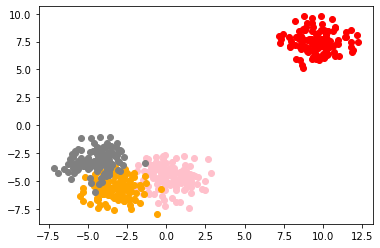

In [7]:
#观察500个样本根据不同的类别对应分布形式
import matplotlib.pyplot as plt
#将不同类别的特征使用不同的颜色表示
color = ['red','pink','orange','gray']
for i in range(4):
    plt.scatter(X[y==i,0],X[y==i,1],c=color[i])

In [8]:
#基于测试样本将其聚成4个簇
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [9]:
model.labels_ #对500个样本的聚类结果

array([0, 3, 3, 0, 2, 2, 2, 1, 3, 1, 1, 1, 2, 3, 0, 0, 1, 2, 1, 2, 3, 2,
       1, 1, 0, 0, 3, 2, 1, 1, 2, 1, 0, 2, 0, 2, 3, 1, 3, 2, 2, 2, 0, 0,
       1, 3, 0, 1, 2, 2, 3, 2, 2, 1, 2, 2, 0, 0, 2, 3, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 3, 2, 1, 2, 3, 1, 3, 1, 2, 2, 1, 0, 1, 3, 3, 3, 1, 0, 1,
       1, 2, 1, 3, 3, 3, 0, 2, 1, 3, 2, 2, 0, 3, 3, 3, 3, 0, 0, 2, 0, 3,
       1, 3, 0, 3, 1, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 3, 1,
       0, 2, 3, 0, 3, 2, 1, 2, 3, 1, 0, 3, 0, 0, 3, 0, 1, 1, 3, 2, 3, 0,
       1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 3, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2,
       3, 3, 3, 0, 2, 2, 2, 1, 0, 1, 0, 3, 0, 1, 0, 3, 1, 1, 2, 0, 2, 3,
       2, 2, 3, 0, 3, 2, 3, 2, 1, 3, 0, 3, 2, 2, 3, 0, 0, 0, 2, 3, 1, 3,
       0, 2, 1, 3, 2, 2, 1, 3, 3, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 2, 1, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 2, 3, 2, 3, 2, 0, 3, 2, 0, 3, 1, 3, 2, 3,
       3, 3, 0, 2, 2, 2, 3, 1, 2, 1, 0, 0, 2, 3, 3, 2, 1, 1, 1, 3, 1, 0,
       1, 3, 3, 0, 0, 0, 2, 3, 2, 0, 0, 3, 1, 2, 0,

- 基于这个分布，我们来使用Kmeans进行聚类。首先，我们要假设一下，这个数据中有几簇?
    - labels_:表示样本聚类的结果
    - cluster_centers_:返回质心坐标
    - inertia_:整体平方和

In [10]:
model.cluster_centers_

array([[ 0.22319694, -4.64295938],
       [ 9.62948899,  7.48461019],
       [-4.48822192, -3.14936766],
       [-3.29516575, -5.71448685]])

In [11]:
model.inertia_

897.4174219305443

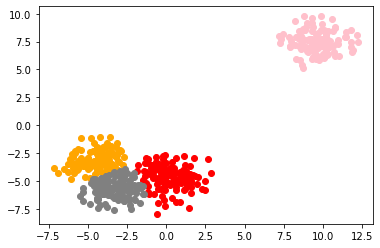

In [12]:
#观察下不同簇下对应的样本分布形态
labels = model.labels_
color = ['red','pink','orange','gray']
for i in range(4):
    plt.scatter(X[labels==i,0],X[labels==i,1],c=color[i])

- Kmeans对结果的预测：
    - KMeans算法通常情况是不需要预测结果的，因为该算法本质上是在对未知分类数据的探索。但是在某些情况下我们也可以使用predict进行预测操作。
    - 我们什么时候需要predict呢？
        - 当数据量太大的时候！
            - 其实我们不必使用所有的数据来寻找质心，少量的数据就可以帮助我们确定质心了。
            - 当我们数据量非常大的时候，我们可以使用部分数据来帮助我们确认质心
            - 剩下的数据的聚类结果，使用predict来调用

In [13]:
#获取了原先样本的一半样本量
X_n = X[0:250]
y_n = y[0:250]

model = KMeans(n_clusters=4)
model.fit(X_n)

KMeans(n_clusters=4)

In [14]:
#使用训练好的模型对另一半样本进行分类
model.predict(X[250:])

array([2, 3, 2, 3, 2, 0, 3, 2, 0, 3, 1, 3, 2, 3, 3, 3, 0, 2, 2, 2, 3, 1,
       2, 1, 0, 0, 2, 3, 3, 2, 1, 1, 1, 3, 1, 0, 1, 3, 3, 0, 0, 0, 2, 3,
       2, 0, 0, 3, 1, 2, 0, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 0, 1, 3, 0, 0,
       3, 2, 1, 1, 1, 0, 3, 3, 0, 0, 1, 2, 0, 0, 3, 1, 2, 2, 1, 0, 1, 0,
       1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 3, 2, 1, 2, 1, 3, 3, 0, 0, 3, 3,
       2, 1, 0, 1, 3, 0, 3, 3, 3, 3, 3, 0, 3, 2, 2, 0, 0, 1, 3, 0, 3, 3,
       0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 2, 2, 0, 3, 0, 0,
       1, 1, 1, 2, 3, 3, 0, 1, 1, 3, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2, 3, 2,
       3, 1, 2, 3, 2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 3, 2, 3, 1, 0,
       3, 0, 2, 0, 2, 3, 1, 0, 1, 2, 1, 3, 3, 2, 1, 2, 0, 0, 0, 1, 2, 3,
       3, 3, 1, 1, 0, 2, 1, 0, 3, 3, 0, 1, 2, 3, 3, 0, 0, 2, 2, 2, 1, 1,
       3, 3, 3, 0, 1, 3, 2, 1], dtype=int32)

- 是否可以使用整体平方和来评估聚类模型聚类的效果？

In [22]:
#查看k值的不同对整体平方和的影响
model = KMeans(n_clusters=2)
model.fit(X)
model.inertia_

2806.679474106651

In [23]:
#查看k值的不同对整体平方和的影响
model = KMeans(n_clusters=4)
model.fit(X)
model.inertia_

897.4174219305443

In [24]:
#查看k值的不同对整体平方和的影响
model = KMeans(n_clusters=6)
model.fit(X)
model.inertia_

694.4647485325643

In [25]:
#查看k值的不同对整体平方和的影响
model = KMeans(n_clusters=10)
model.fit(X)
model.inertia_


#通过测试发现，整体平方和会随着k的增大而减小

425.1844972345162

- silhouette_score计算轮廓系数
    - 在sklearn中，我们使用模块metrics中的类silhouette_score来计算轮廓系数，它返回的是一个数据集中，所有样本的轮廓系数的均值。
- silhouette_sample
    - 但我们还有同在metrics模块中的silhouette_sample，它的参数与轮廓系数一致，但返回的 是数据集中每个样本自己的轮廓系数

In [15]:
from sklearn.metrics import silhouette_score

In [20]:
X,y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=2020)

In [16]:
#使用所有样本训练模型
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [17]:
labels = model.labels_
silhouette_score(X,labels)

0.5777450114792333